In [1]:
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
# from util import gdal_xarray_functions as gdal_xa 

In [2]:
ds = xr.open_mfdataset(
    os.path.join(os.getcwd(), "Dados/") +
    # 'SurfaceNO2' +
    "SurfaceNO2_0.0083deg_2020.nc"
)

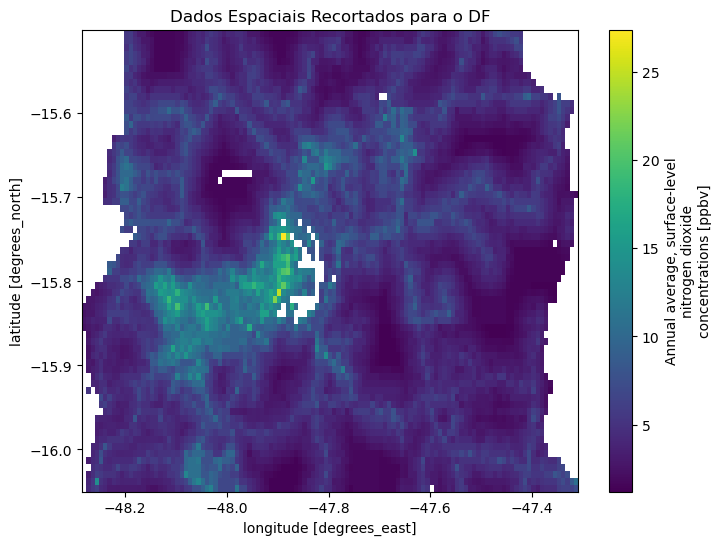

In [13]:
# Suponha que a variável relevante seja 'variavel'
da = ds['SurfaceNO2']

# 2. Definir a área do Distrito Federal (usando um shapefile, por exemplo)
path_shp = os.path.join(os.getcwd(), "SHP/")
shapefile_df = os.path.join(os.getcwd(), "SHP/") + "Limite_RA_2022_GEOPORTAL_35.shp"  # Caminho do shapefile do DF
shapefile_macha = os.path.join(os.getcwd(), "SHP/") + "MANCHAURBANA_2023_35_RA.shp"  # Caminho do shapefile do DF
gdf_df = gpd.read_file(shapefile_df)

# 3. Certificar-se de que o raster tem sistema de referência espacial (CRS)
da = da.rio.write_crs("EPSG:4326")  # Verifique qual CRS o seu dado está usando

# 4. Reprojetar o shapefile para o CRS do raster
gdf_df = gdf_df.to_crs(da.rio.crs)

# Recortar os dados para o DF
da_clip = da.rio.clip(gdf_df.geometry, gdf_df.crs)

# 5. Plotar o resultado
plt.figure(figsize=(8, 6))
da_clip.plot(cmap='viridis')
plt.title("Dados Espaciais Recortados para o DF")
plt.show()


In [8]:
ds

<xarray.Dataset>
Dimensions:     (lat: 16200, lon: 43080)
Coordinates:
  * lat         (lat) float64 -60.05 -60.04 -60.03 -60.02 ... 74.93 74.94 74.95
  * lon         (lon) float64 -179.5 -179.5 -179.5 -179.5 ... 179.4 179.4 179.4
Data variables:
    crs         |S1 ...
    SurfaceNO2  (lat, lon) float32 dask.array<chunksize=(16200, 43080), meta=np.ndarray>

In [9]:
ds['SurfaceNO2']

<xarray.DataArray 'SurfaceNO2' (lat: 16200, lon: 43080)>
dask.array<open_dataset-SurfaceNO2, shape=(16200, 43080), dtype=float32, chunksize=(16200, 43080), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -60.05 -60.04 -60.03 -60.02 ... 74.93 74.94 74.95
  * lon      (lon) float64 -179.5 -179.5 -179.5 -179.5 ... 179.4 179.4 179.4
Attributes:
    long_name:     Annual average, surface-level nitrogen dioxide concentrations
    grid_mapping:  crs
    units:         ppbv

In [10]:
da_clip


<xarray.DataArray 'SurfaceNO2' (lat: 63, lon: 80)>
dask.array<getitem, shape=(63, 80), dtype=float32, chunksize=(63, 80), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -16.05 -16.04 -16.03 -16.02 ... -15.55 -15.54 -15.53
  * lon      (lon) float64 -48.24 -48.23 -48.22 -48.21 ... -47.6 -47.59 -47.58
    crs      int32 0
Attributes:
    long_name:     Annual average, surface-level nitrogen dioxide concentrations
    grid_mapping:  crs
    units:         ppbv

In [14]:
# Salvar raster final
if os.path.exists(os.path.join(os.getcwd(), 'TIF', "SurfaceNO2_DF.tif")):
    print(f"O arquivo SurfaceNO2_DF.tif já existe")  # Exibir mensagem
else:
    # Remover o atributo 'grid_mapping' para evitar erros
    # da_clip.attrs.pop('grid_mapping', None)
    da_clip.attrs.clear()  # Importar a função de utilidades
    da_clip.rio.to_raster(os.path.join(os.getcwd(), 'TIF', "SurfaceNO2_DF.tif"))  # Salvar o raster
    print("O arquivo SurfaceNO2_DF.tif foi criado com sucesso")  # Exibir mensagem

O arquivo SurfaceNO2_DF.tif foi criado com sucesso


In [ ]:
ds.attrs.clear()

{'GDAL_AREA_OR_POINT': 'Area',
 'Conventions': 'CF-1.5',
 'GDAL': 'GDAL 3.1.2, released 2020/07/07',
 'title': 'Nitrogen Dioxide Surface-Level Annual Average Concentrations',
 'NCO': 'netCDF Operators version 4.9.3 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)',
 'institution': 'George Washington University, Department of Environmental and Occupational Health',
 'source': 'A land-use regression model (based on 5220 NO2 monitors in 58 countries and land use variables) estimates nitrogen dioxide concentrations for 2010-12. NO2 column densities from the Ozone Monitoring Instrument and MERRA-2 scale the concentrations to other years between 1990 and 2020.',
 'references': 'Anenberg, S. C., Mohegh, A., Goldberg, D. L., Kerr, G. H., Brauer, M., Burkart, K., et al. (2022). Long-term trends in urban NO2 concentrations and associated paediatric asthma incidence: estimates from global datasets. Lancet Planetary Health. 6(1): e49-58. https://doi.org/10.1016/s2542-5196(21)00255-